count    1063.000000
mean       75.674506
std        47.816518
min         6.000000
25%        43.000000
50%        62.000000
75%        97.000000
max       402.000000
Name: TOTSPACE, dtype: float64
0.901775598526001 1.4964898448030214e-25
one way anova_summary:                 df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)     2.0  9.611211e+04  48056.057145  21.843051  5.057716e-10
Residual    1060.0  2.332065e+06   2200.061571        NaN           NaN
one way levene_summary:                 Parameter   Value
0      Test statistics (W)  9.1994
1  Degrees of freedom (Df)  2.0000
2                  p value  0.0001
One-Way ANOVA Results:                   sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


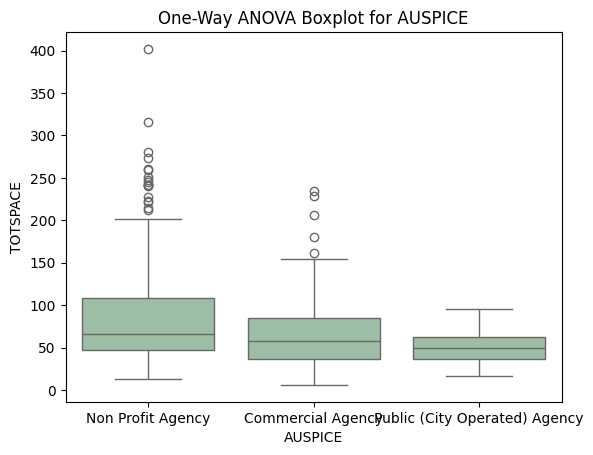

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

on way tukey_summary:              group1                         group2       Diff      Lower  \
0  Non Profit Agency              Commercial Agency  16.806538   3.993722   
1  Non Profit Agency  Public (City Operated) Agency  36.177966   8.673910   
2  Commercial Agency  Public (City Operated) Agency  19.371429 -10.141900   

       Upper   q-value   p-value  
0  29.619353  4.356853  0.006071  
1  63.682022  4.369046  0.005901  
2  48.884757  2.180132  0.272554  


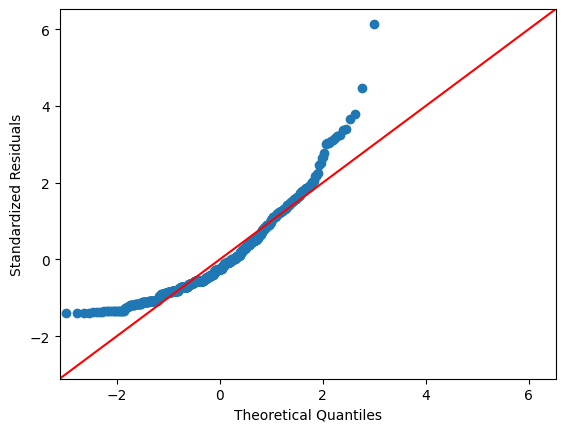

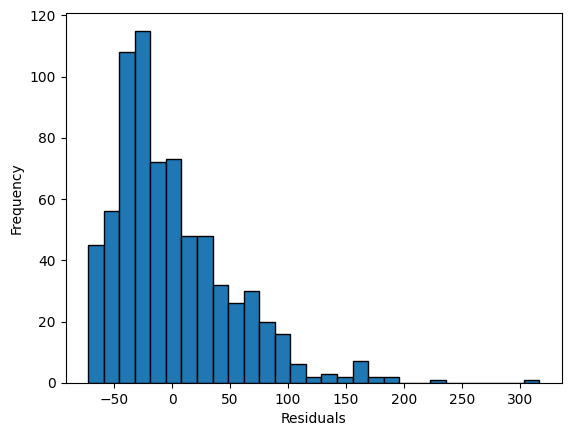

In [10]:
#import stuff here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# load data file
df = pd.read_excel("INF2178_A2_data.xlsx")

# Since dataset is already formatted appropriately for a two-way ANOVA, there is no need to reshape df_melt_one_way.

#descriptive statistics
descriptive_stats = df['TOTSPACE'].describe()
print(descriptive_stats)

# create regression
model_one_way = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_one_way.resid)
print(w, pvalue)
res = stat()
res.anova_stat(df=df, res_var="TOTSPACE", anova_model="TOTSPACE ~ C(AUSPICE)")
print(f"one way anova_summary: {res.anova_summary}")

#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
print(f"one way levene_summary:{res.levene_summary}")

# Perform one-way ANOVA
anova_results_one_way = sm.stats.anova_lm(model_one_way, typ=2)
print("One-Way ANOVA Results:", anova_results_one_way)

# One-way ANOVA boxplot
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
plt.title("One-Way ANOVA Boxplot for AUSPICE")
plt.show()


#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model="TOTSPACE ~ C(AUSPICE)")
print(f"on way tukey_summary:{res.tukey_summary}")

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()




0.901775598526001 1.4964898448030214e-25
one way levene_summary:                 Parameter    Value
0      Test statistics (W)  10.2813
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000


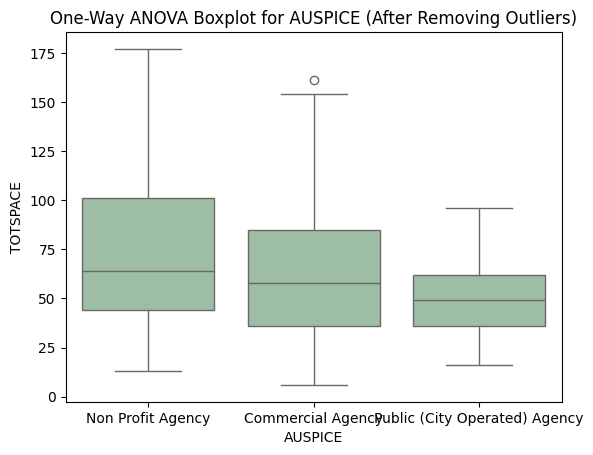

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

on way tukey_summary:              group1                         group2      Diff     Lower  \
0  Non Profit Agency              Commercial Agency  12.96786  2.820554   
1  Non Profit Agency  Public (City Operated) Agency  28.04237  6.599593   
2  Commercial Agency  Public (City Operated) Agency  15.07451 -7.966449   

       Upper   q-value   p-value  
0  23.115166  4.245276  0.007827  
1  49.485147  4.344322  0.006255  
2  38.115469  2.173356  0.274793  


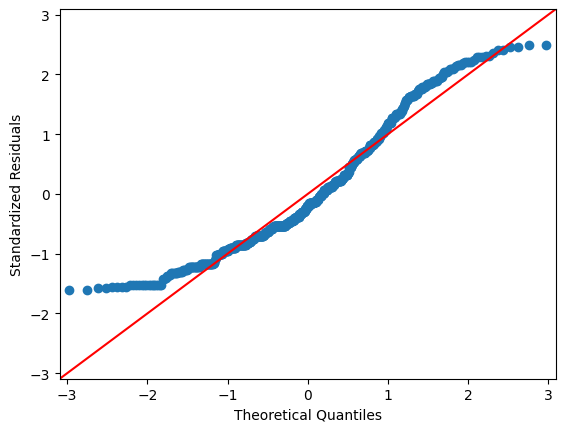

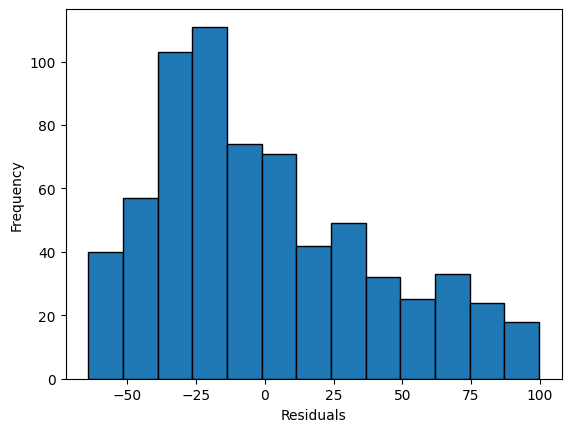

In [11]:
#remove outliers to determine if non-normal distribution is influenced by outliers
#import numpy as np

# Calculate Q1, Q3, and IQR for TOTSPACE
Q1 = df['TOTSPACE'].quantile(0.25)
Q3 = df['TOTSPACE'].quantile(0.75)
IQR = Q3 - Q1

# Define filters for outliers
filters = (df['TOTSPACE'] >= (Q1 - 1.5 * IQR)) & (df['TOTSPACE'] <= (Q3 + 1.5 * IQR))

# Apply filters to df to create a new DataFrame without outliers
df_filtered = df[filters]

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_one_way.resid)
print(w, pvalue)

#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_filtered, res_var='TOTSPACE', xfac_var='AUSPICE')
print(f"one way levene_summary:{res.levene_summary}")

# boxplot
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df_filtered, color='#99c2a2')
plt.title("One-Way ANOVA Boxplot for AUSPICE (After Removing Outliers)")
plt.show()


#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_filtered, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model="TOTSPACE ~ C(AUSPICE)")
print(f"on way tukey_summary:{res.tukey_summary}")

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()




Two-Way ANOVA Results:                              sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN
anova_table:                              sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN

anova_summary:                            df        sum_sq       mean_sq          F  \
C(AUSPICE)                2.0  8.567996e+03   4283.998054   2.057586   
C(subsidy)                1.0  8.352744e+04  83527.441787  40.117876   
C(AUSPICE):C(subsidy)     2.0  5.603445e+0

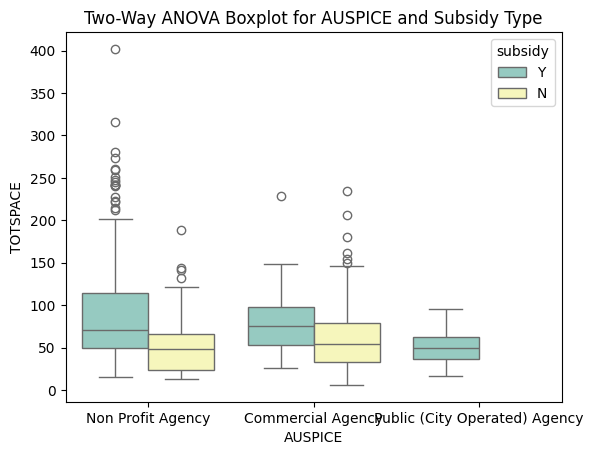

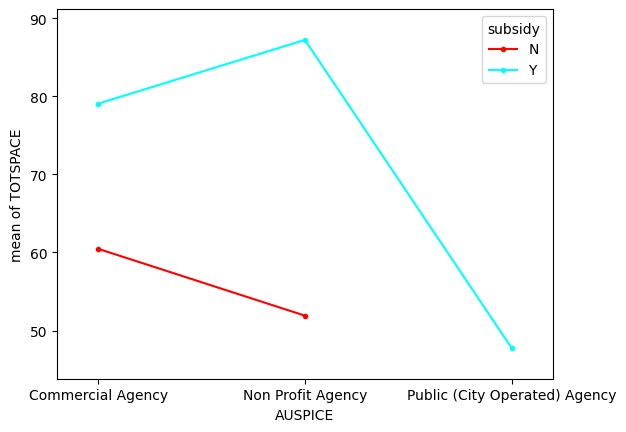

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

tukey_hsd-tukey_summary:               group1                         group2       Diff     Lower  \
0  Non Profit Agency              Commercial Agency  16.806538  4.406270   
1  Non Profit Agency  Public (City Operated) Agency  36.177966  9.559488   
2  Commercial Agency  Public (City Operated) Agency  19.371429 -9.191627   

       Upper   q-value   p-value  
0  29.206805  4.501830  0.004333  
1  62.796444  4.514429  0.004205  
2  47.934484  2.252677  0.249650  

tukey_hsd-tukey_summary:   group1 group2       Diff      Lower     Upper    q-value  p-value
0      Y      N  34.121178  24.873006  43.36935  10.244062    0.001

tukey_hsd-tukey_summary-head:                    group1                              group2       Diff  \
0  (Non Profit Agency, Y)              (Non Profit Agency, N)  44.986164   
1  (Non Profit Agency, Y)              (Commercial Agency, Y)   0.145138   
2  (Non Profit Agency, Y)              (Commercial Agency, N)  28.370552   
3  (Non Profit Agency, Y)  (Publi

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:905: RuntimeWarning: divide by zero encountered in divide
  mse_factor = np.sqrt(np.divide(mse, group1_count) + np.divide(mse, group2_count))
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:913: RuntimeWarning: divide by zero encountered in divide
  np.divide(1, group2_count)))))
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:916: RuntimeWarning: divide by zero encountered in divide
  np.divide(1, group2_count)))))


In [12]:
## two way ANOVA
# perform two way ANOVA with outliers

model_two_way = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=df).fit()
anova_results_two_way = sm.stats.anova_lm(model_two_way, typ=2)
print("Two-Way ANOVA Results:", anova_results_two_way)

# boxplot
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy",data=df, palette="Set3")
plt.title("Two-Way ANOVA Boxplot for AUSPICE and Subsidy Type")
model=ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(f"anova_table: {anova_table}\n")


res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(f"anova_summary: {res.anova_summary}\n")


# interaction plot
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=df['AUSPICE'],trace=df['subsidy'],response=df['TOTSPACE'])
plt.show()

res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='AUSPICE',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(f"tukey_hsd-tukey_summary: {res.tukey_summary}\n")

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(f"tukey_hsd-tukey_summary: {res.tukey_summary}\n")

res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(f"tukey_hsd-tukey_summary-head: {res.tukey_summary.head()}\n")